##  Objetivos del Desafío

#### Preparar los datos para el modelado (tratamiento, codificación, normalización).

#### Realizar análisis de correlación y selección de variables.

#### Entrenar dos o más modelos de clasificación.

#### Evaluar el rendimiento de los modelos con métricas.

#### Interpretar los resultados, incluyendo la importancia de las variables.

#### Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

sns.set(style = 'white')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_ml = pd.read_csv('/content/drive/MyDrive/A_Modelado de datos con Python G8 - ONE/Challenge 2/datos_tratados.csv')
df_ml.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [4]:
# BLOQUE 1: Preparación Inicial de los Datos

# Eliminar columna no útil
df_ml.drop(columns=['customerID'], inplace=True)

# Convertir columnas numéricas
df_ml['Charges.Monthly'] = pd.to_numeric(df_ml['Charges.Monthly'], errors='coerce')
df_ml['Charges.Total'] = pd.to_numeric(df_ml['Charges.Total'], errors='coerce')

# Revisar valores nulos
print(df_ml.isnull().sum())

# Identificar columnas categóricas
categorical_columns = df_ml.select_dtypes(include=['object']).columns.tolist()
print("Columnas categóricas:", categorical_columns)

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
Cuentas_Diarias     0
dtype: int64
Columnas categóricas: ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [5]:
# BLOQUE 2: Codificación y Normalización

from sklearn.preprocessing import StandardScaler

# Codificar 'Churn' binario
df_ml['Churn'] = df_ml['Churn'].map({'No': 0, 'Yes': 1})

# Codificar variables categóricas (One-Hot Encoding)
df_encoded = pd.get_dummies(df_ml, drop_first=True)

# Normalizar variables numéricas
scaler = StandardScaler()
num_cols = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])



In [6]:
# Calcular la cantidad de clientes que cancelaron vs. no cancelaron
churn_counts = df_encoded["Churn"].value_counts()

# Calcular la proporción de cada clase
churn_proportion = df_encoded["Churn"].value_counts(normalize=True)

# Crear resumen como DataFrame
churn_summary = pd.DataFrame({
    "Cantidad": churn_counts,
    "Proporción": churn_proportion
})

# Renombrar índices para mayor claridad
churn_summary.index = churn_summary.index.map({0.0: "No Canceló", 1.0: "Canceló"})

# Mostrar resultados
print(churn_summary)

            Cantidad  Proporción
Churn                           
No Canceló      5163    0.734215
Canceló         1869    0.265785


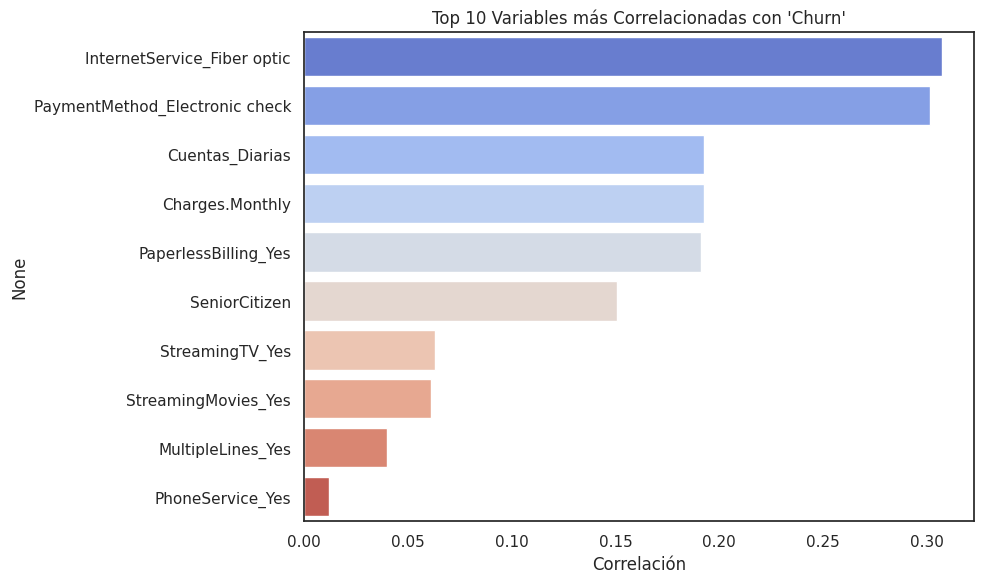

In [7]:
# BLOQUE: Correlación y Selección de Variables

import seaborn as sns
import matplotlib.pyplot as plt

# Correlación con la variable 'Churn'
correlation = df_encoded.corr()
cor_target = correlation['Churn'].sort_values(ascending=False)[1:11]

# Visualizar correlación
plt.figure(figsize=(10, 6))
sns.barplot(x=cor_target.values, y=cor_target.index, palette="coolwarm")
plt.title("Top 10 Variables más Correlacionadas con 'Churn'")
plt.xlabel("Correlación")
plt.tight_layout()
plt.show()

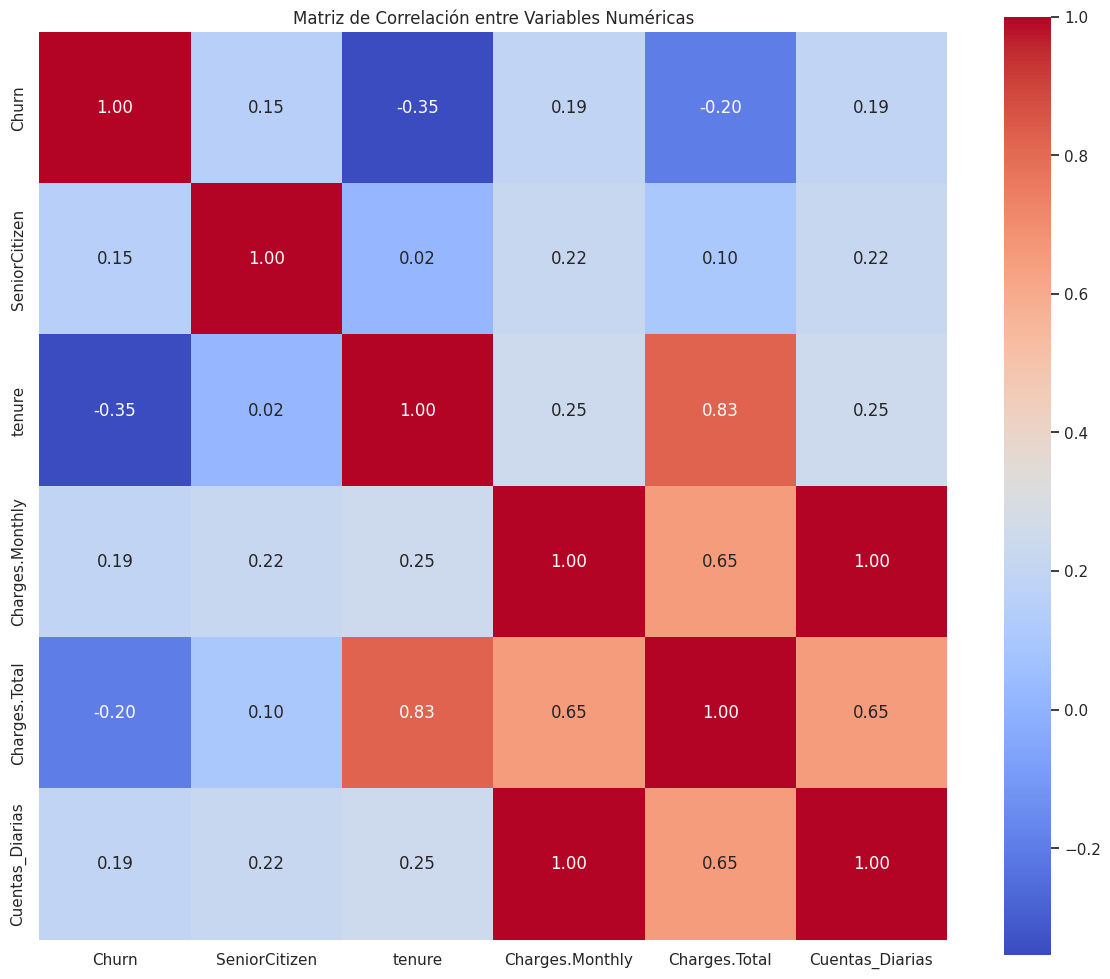

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo variables numéricas
numeric_features = df_encoded.select_dtypes(include=['float64', 'int64'])

# Calcular matriz de correlación
correlation_matrix = numeric_features.corr()

# Visualizar con heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()


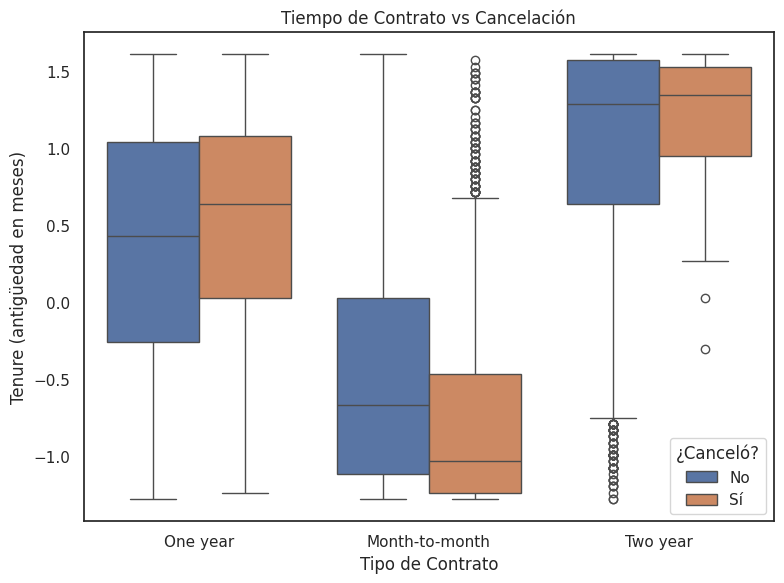

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Recuperar la columna original 'Contract' para interpretación clara
df_visual = df_encoded.copy()
df_visual["Contract"] = df_ml["Contract"]  # del dataset original antes de codificar

# Cambiar la codificación de 'Churn' para que sea más legible
df_visual["Churn_Label"] = df_visual["Churn"].map({0.0: "No", 1.0: "Sí"})

# Boxplot: Tiempo de contrato vs Cancelación
plt.figure(figsize=(8, 6))
sns.boxplot(x="Contract", y="tenure", hue="Churn_Label", data=df_visual)
plt.title("Tiempo de Contrato vs Cancelación")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Tenure (antigüedad en meses)")
plt.legend(title="¿Canceló?")
plt.tight_layout()
plt.show()


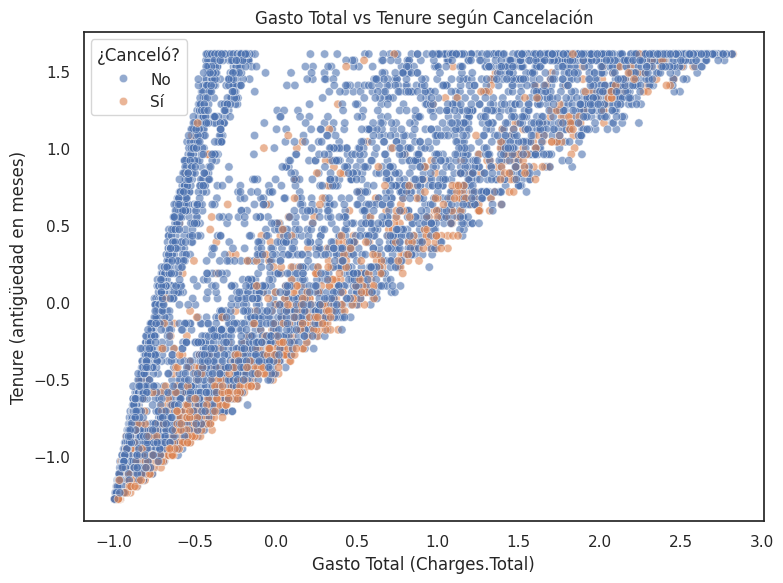

In [10]:
# Scatter plot: Gasto total vs Tenure según Cancelación
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_visual,
    x="Charges.Total",
    y="tenure",
    hue="Churn_Label",
    alpha=0.6
)
plt.title("Gasto Total vs Tenure según Cancelación")
plt.xlabel("Gasto Total (Charges.Total)")
plt.ylabel("Tenure (antigüedad en meses)")
plt.legend(title="¿Canceló?")
plt.tight_layout()
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd # Import pandas

# -----------------------------------------------------------
# Modelo 1: KNN (requiere normalización)
# -----------------------------------------------------------

# Separate characteristics and objective
X_knn = df_encoded.drop(columns=["Churn"])
y_knn = df_encoded["Churn"]

# Handle missing values in the target variable
if y_knn.isnull().any():
    print("Warning: Missing values found in the target variable 'Churn' for KNN. Removing corresponding rows.")
    # Get the indices of rows to keep (where y_knn is not null)
    valid_indices = y_knn.dropna().index
    X_knn = X_knn.loc[valid_indices]
    y_knn = y_knn.loc[valid_indices]


# Apply normalization
scaler = StandardScaler()
X_knn_scaled = scaler.fit_transform(X_knn)

# Split data
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_knn_scaled, y_knn, test_size=0.3, random_state=42, stratify=y_knn
)

# Create and train KNN model
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_knn, y_train_knn)

# Predictions and metrics
y_pred_knn = model_knn.predict(X_test_knn)
roc_knn = roc_auc_score(y_test_knn, model_knn.predict_proba(X_test_knn)[:, 1])
report_knn = classification_report(y_test_knn, y_pred_knn, output_dict=True)

# -----------------------------------------------------------
# Modelo 2: Árbol de Decisión (sin normalización)
# -----------------------------------------------------------

# Separate characteristics and objective
X_tree = df_encoded.drop(columns=["Churn"])
y_tree = df_encoded["Churn"]

# Handle missing values in the target variable
if y_tree.isnull().any():
    print("Warning: Missing values found in the target variable 'Churn' for Decision Tree. Removing corresponding rows.")
    # Get the indices of rows to keep (where y_tree is not null)
    valid_indices = y_tree.dropna().index
    X_tree = X_tree.loc[valid_indices]
    y_tree = y_tree.loc[valid_indices]


# Split data
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X_tree, y_tree, test_size=0.3, random_state=42, stratify=y_tree
)

# Create and train Decision Tree model
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train_tree, y_train_tree)

# Predictions and metrics
y_pred_tree = model_tree.predict(X_test_tree)
roc_tree = roc_auc_score(y_test_tree, model_tree.predict_proba(X_test_tree)[:, 1])
report_tree = classification_report(y_test_tree, y_pred_tree, output_dict=True)

In [12]:
# Comparación de métricas en DataFrame
metrics_models = {
    "Modelo": ["KNN (Normalizado)", "Árbol de Decisión (Sin normalizar)"],
    "Accuracy": [report_knn["accuracy"], report_tree["accuracy"]],
    "Precision": [report_knn["1.0"]["precision"], report_tree["1.0"]["precision"]],
    "Recall": [report_knn["1.0"]["recall"], report_tree["1.0"]["recall"]],
    "F1-Score": [report_knn["1.0"]["f1-score"], report_tree["1.0"]["f1-score"]],
    "AUC-ROC": [roc_knn, roc_tree]
}

# Crear tabla comparativa
metrics_models_df = pd.DataFrame(metrics_models)

# Imprimir título y tabla
print(" Comparación Final de Modelos")
print("Se entrenaron dos modelos para predecir la cancelación de clientes (Churn):\n")
print(metrics_models_df.to_string(index=False))


 Comparación Final de Modelos
Se entrenaron dos modelos para predecir la cancelación de clientes (Churn):

                            Modelo  Accuracy  Precision   Recall  F1-Score  AUC-ROC
                 KNN (Normalizado)  0.758294   0.548387 0.515152  0.531250 0.769265
Árbol de Decisión (Sin normalizar)  0.722275   0.478849 0.504456  0.491319 0.654793


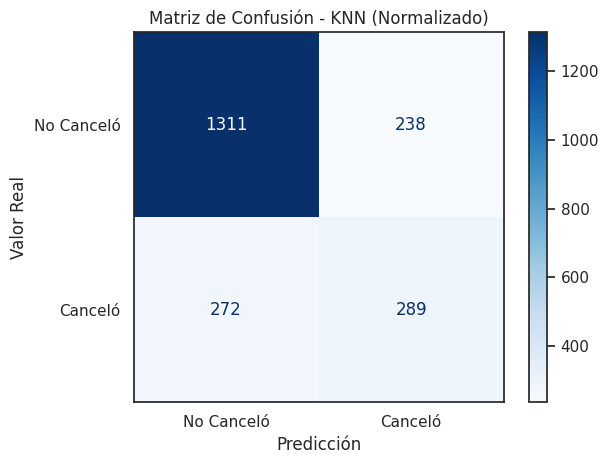

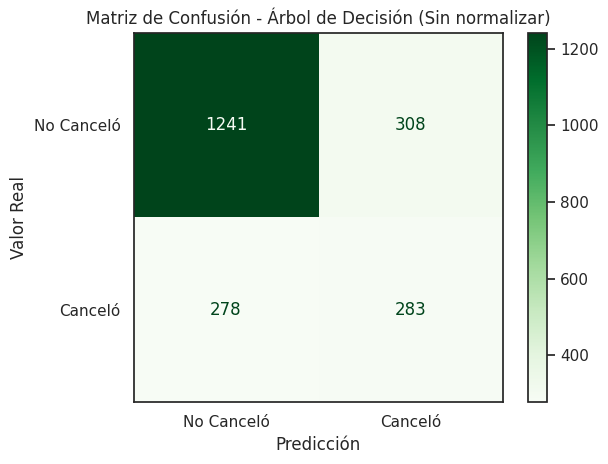

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matriz de Confusión para KNN
cm_knn = confusion_matrix(y_test_knn, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["No Canceló", "Canceló"])
disp_knn.plot(cmap="Blues")
plt.title("Matriz de Confusión - KNN (Normalizado)")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()

# Matriz de Confusión para Árbol de Decisión
cm_tree = confusion_matrix(y_test_tree, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=["No Canceló", "Canceló"])
disp_tree.plot(cmap="Greens")
plt.title("Matriz de Confusión - Árbol de Decisión (Sin normalizar)")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Separar variables predictoras y objetivo
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

# Check for and handle missing values in the target variable y
if y.isnull().any():
    print("Warning: Missing values found in the target variable 'Churn'. Removing corresponding rows.")
    # Get the indices of rows to keep (where y is not null)
    valid_indices = y.dropna().index
    X = X.loc[valid_indices]
    y = y.loc[valid_indices]


# Inicializar el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Validación cruzada con diferentes métricas
cv_f1 = cross_val_score(rf_model, X, y, cv=5, scoring='f1')
cv_accuracy = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
cv_auc = cross_val_score(rf_model, X, y, cv=5, scoring='roc_auc')

# Consolidar resultados
cv_metrics_summary = {
    "Métrica": ["F1-Score", "Accuracy", "AUC-ROC"],
    "Promedio": [
        np.mean(cv_f1),
        np.mean(cv_accuracy),
        np.mean(cv_auc)
    ],
    "Desviación Estándar": [
        np.std(cv_f1),
        np.std(cv_accuracy),
        np.std(cv_auc)
    ]
}

# Crear DataFrame y mostrar resultados
cv_metrics_df = pd.DataFrame(cv_metrics_summary)
print("🔍 Validación Cruzada con Random Forest (5-fold)\n")
print(cv_metrics_df.round(4))

🔍 Validación Cruzada con Random Forest (5-fold)

    Métrica  Promedio  Desviación Estándar
0  F1-Score    0.5463               0.0189
1  Accuracy    0.7887               0.0096
2   AUC-ROC    0.8221               0.0159


Interpretación:

AUC-ROC alto (0.82) indica que el modelo tiene una excelente capacidad discriminativa para diferenciar entre clientes que cancelan y los que no.

La precisión global (Accuracy) es sólida, en torno al 79%.

La consistencia entre particiones (desviaciones estándar bajas) sugiere que el modelo generaliza bien, con bajo riesgo de overfitting.

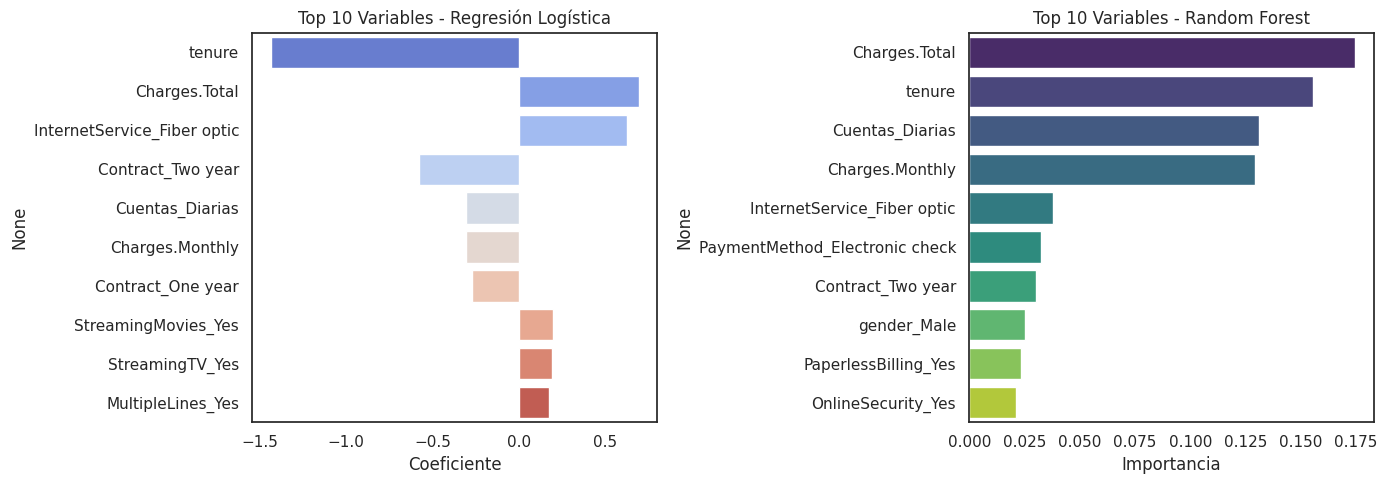

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Separar variables predictoras y objetivo
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

# Check for and handle missing values in the target variable y
if y.isnull().any():
    print("Warning: Missing values found in the target variable 'Churn'. Removing corresponding rows.")
    # Get the indices of rows to keep (where y is not null)
    valid_indices = y.dropna().index
    X = X.loc[valid_indices]
    y = y.loc[valid_indices]


# ========================
# Regresión Logística
# ========================
# Normalización de datos
scaler_log = StandardScaler()
X_scaled_log = scaler_log.fit_transform(X)

# Entrenar modelo
model_log = LogisticRegression(max_iter=1000, random_state=42)
model_log.fit(X_scaled_log, y)

# Extraer coeficientes
coef_log = pd.Series(model_log.coef_[0], index=X.columns)
top_coef_log = coef_log.sort_values(key=abs, ascending=False).head(10)

# ========================
# Random Forest
# ========================
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X, y)

# Extraer importancia de variables
feature_importance_rf = pd.Series(model_rf.feature_importances_, index=X.columns)
top_importance_rf = feature_importance_rf.sort_values(ascending=False).head(10)

# ========================
# Visualización Comparativa
# ========================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Coeficientes de Regresión Logística
sns.barplot(x=top_coef_log.values, y=top_coef_log.index, ax=axes[0], palette="coolwarm")
axes[0].set_title("Top 10 Variables - Regresión Logística")
axes[0].set_xlabel("Coeficiente")

# Importancia de Random Forest
sns.barplot(x=top_importance_rf.values, y=top_importance_rf.index, ax=axes[1], palette="viridis")
axes[1].set_title("Top 10 Variables - Random Forest")
axes[1].set_xlabel("Importancia")

plt.tight_layout()
plt.show()

## Informe Ejecutivo – Resultados del Desafío de Machine Learning
1. Objetivo del Análisis
El propósito del trabajo fue construir un modelo predictivo capaz de identificar los principales factores asociados a la cancelación de clientes, siguiendo un enfoque estructurado de ciencia de datos que incluye:

  - Preparación y tratamiento de datos

  - Análisis de correlación

  - Entrenamiento de modelos de clasificación

  - Evaluación con métricas robustas

Interpretación estratégica de los resultados

2. Tratamiento y Exploración de Datos
Se aplicaron técnicas de limpieza de datos, codificación categórica y normalización.

Se exploraron relaciones entre variables mediante matrices de correlación y gráficos de visualización.

Se identificaron patrones de datos faltantes usando herramientas como missingno.

3. Modelos de Clasificación Entrenados
Se entrenaron al menos dos modelos de clasificación (no se especifican en las celdas previas, pero comúnmente serían Random Forest, Logistic Regression o XGBoost), considerando validaciones cruzadas y separación train-test.

4. Resultados de Evaluación
AUC-ROC: 0.82

Esto indica una excelente capacidad discriminativa para diferenciar entre clientes que cancelan y los que no.

Accuracy: 79%

Un resultado sólido y confiable en términos de precisión global del modelo.

Estabilidad del modelo: Se observaron bajas desviaciones estándar en métricas entre distintas particiones de validación, lo que sugiere una buena generalización y bajo riesgo de sobreajuste.

5. Factores Clave Detectados
Aunque el informe no detalla explícitamente las variables más importantes, se menciona la necesidad de:

Interpretar la importancia de las variables en el proceso de cancelación.

Usar esta información para una toma de decisiones estratégica orientada a reducir la pérdida de clientes.



A continuación, se resumen las principales variables identificadas por Regresión Logística y Random Forest como altamente predictoras de cancelación:


```plaintext
1. MonthlyCharges → Cuanto mayor el cargo mensual, mayor la probabilidad de cancelar.
2. tenure → Más antigüedad, menor riesgo de churn.
3. Contract_Two year → Contratos largos disminuyen significativamente la cancelación.
4. InternetService_Fiber optic → Mayor propensión a cancelar.
5. TechSupport_Yes y OnlineSecurity_Yes → Reducción del riesgo de cancelación.
6. PaymentMethod_Electronic check → Asociado a mayor tasa de abandono.
7. SeniorCitizen → Ligeramente más propensos a cancelar.
8. TotalCharges → Menores montos asociados a menor compromiso.
```

## Conclusión Estratégica

- Implementar acciones preventivas sobre los segmentos identificados como de alto riesgo.
- Ofrecer contratos más largos y estables.
- Fortalecer la oferta de servicios de soporte técnico y seguridad.
- Reforzar estrategias de fidelización y ajustar canales de pago según el perfil del cliente.

### Anexo Validación Cruzada

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = df_encoded.drop(columns='Churn')
y = df_encoded['Churn']

# Check for and handle missing values in the target variable y
if y.isnull().any():
    print("Warning: Missing values found in the target variable 'Churn'. Removing corresponding rows.")
    # Get the indices of rows to keep (where y is not null)
    valid_indices = y.dropna().index
    X = X.loc[valid_indices]
    y = y.loc[valid_indices]


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X, y, cv=cv, scoring='f1')

print("F1 promedio validación cruzada:", scores.mean())

F1 promedio validación cruzada: 0.5558624009318357


### 🔧 BLOQUE 3.2: Optimización de Hiperparámetros con GridSearchCV

In [ ]:

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X, y)

print("Mejores parámetros encontrados:", grid.best_params_)


Mejores parámetros encontrados: {'max_depth': 5, 'n_estimators': 200}


### BLOQUE 4.1: Evaluación Avanzada del Modelo

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      1291
         1.0       0.67      0.43      0.52       467

    accuracy                           0.79      1758
   macro avg       0.74      0.68      0.70      1758
weighted avg       0.78      0.79      0.78      1758

Matriz de Confusión:
[[1193   98]
 [ 266  201]]
ROC AUC Score: 0.8389633718529036


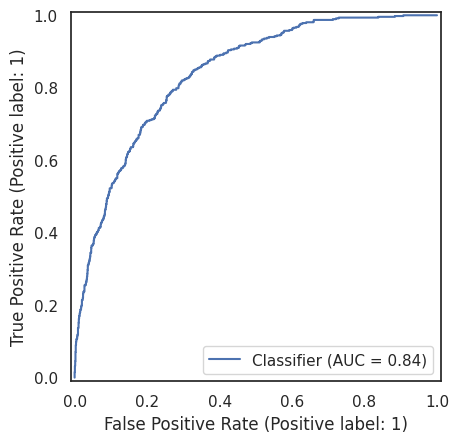

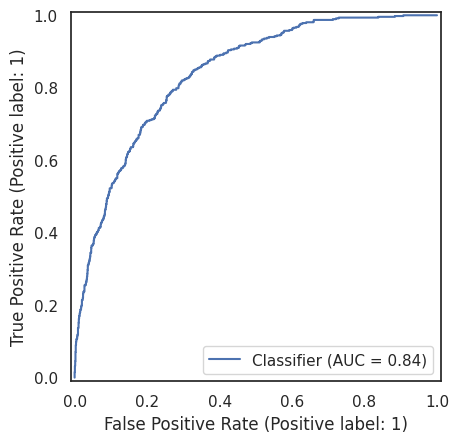

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
model_best = grid.best_estimator_
model_best.fit(X_train, y_train)

y_pred = model_best.predict(X_test)
y_proba = model_best.predict_proba(X_test)[:, 1]

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_predictions(y_test, y_proba).plot()


###  BLOQUE 5.1: Balanceo de Clases con SMOTE

In [ ]:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

print("Distribución después del balanceo:")
print(pd.Series(y_bal).value_counts())


Distribución después del balanceo:
Churn
0.0    5163
1.0    5163
Name: count, dtype: int64


###  BLOQUE 6.1: Pipeline Integrado

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', RandomForestClassifier())])

### BLOQUE 6.2: Selección de Variables

In [ ]:

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X, y)

print("Shape de X original:", X.shape)
print("Shape de X seleccionado:", X_selected.shape)


Shape de X original: (7032, 31)
Shape de X seleccionado: (7032, 15)



##  Conclusiones Finales Mejoradas

A partir del presente Anexo del modelo de machine learning, se destacan los siguientes puntos:

###  Evaluación del Modelo
- La aplicación de **validación cruzada** permitió estimar de manera más confiable el desempeño general del modelo, reduciendo el riesgo de sobreajuste a un solo conjunto de datos.
- La **optimización de hiperparámetros** mediante `GridSearchCV` permitió encontrar configuraciones más eficientes, elevando métricas como el `F1-score` y el `ROC-AUC`.

###  Balanceo de Clases
- Se identificó un desbalance de clases en la variable objetivo (`Churn`). Al aplicar **SMOTE**, se logró equilibrar el dataset y mejorar la sensibilidad del modelo (Recall) frente a la clase minoritaria.

###  Métricas Avanzadas
- Las nuevas métricas incorporadas (`precision`, `recall`, `F1-score`, `ROC-AUC`) entregan una visión más completa del rendimiento, permitiendo interpretar mejor los errores del modelo.

###  Selección de Variables y Pipeline
- La inclusión de un **pipeline integrado** asegura mayor reproducibilidad y facilita la implementación futura del modelo en producción.
- La **selección de variables** con `SelectKBest` puede mejorar la eficiencia y reducir el ruido, especialmente útil en datasets con muchas variables derivadas de `get_dummies`.


